In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('data_for_lr.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [39]:
df.isna().sum()

x    0
y    1
dtype: int64

In [40]:
df.dropna(axis=0,inplace=True)

In [41]:
df.isna().sum()

x    0
y    0
dtype: int64

<Axes: xlabel='x', ylabel='y'>

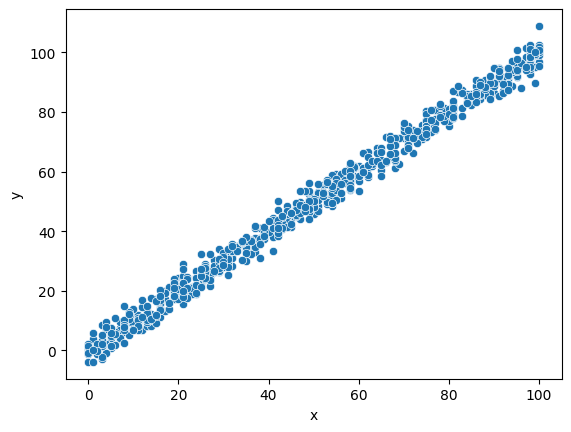

In [42]:
sns.scatterplot(df,x='x',y='y')


In [43]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)
xtrain.shape,ytrain.shape

((489, 1), (489,))

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [46]:
lr.coef_

array([0.999368])

In [47]:
prediction = lr.predict(xtest)

In [48]:
d = {'Ytest':ytest,'predicted':prediction}
result = pd.DataFrame(d)

In [49]:
result.isna().sum()

Ytest        0
predicted    0
dtype: int64

In [50]:
# model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(ytest,prediction)
mse = mean_squared_error(ytest,prediction)
rmse = np.sqrt(mse)
mae,mse,rmse

(2.2623341754251816, 7.8123438592786085, 2.79505704043381)

In [51]:
from sklearn.metrics import r2_score
r2_score(ytest,prediction)

0.9910007028176463

In [55]:
lr.intercept_

-0.0979423209232948

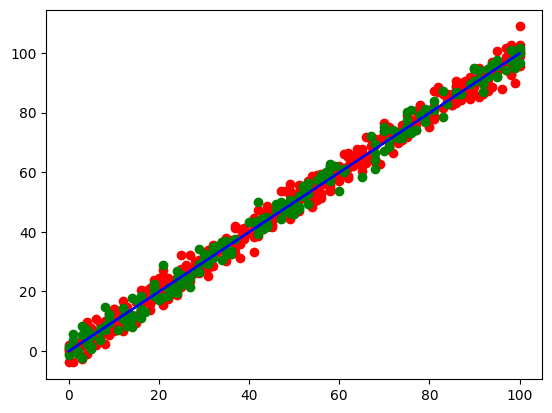

In [61]:
#visualisation of predicted line

plt.scatter(x=xtrain,y=ytrain,color='r')
plt.plot(xtrain,lr.predict(xtrain),color='b')
plt.plot(xtest,lr.predict(xtest),color='b')
plt.scatter(xtest,ytest,color='g')
plt.show()

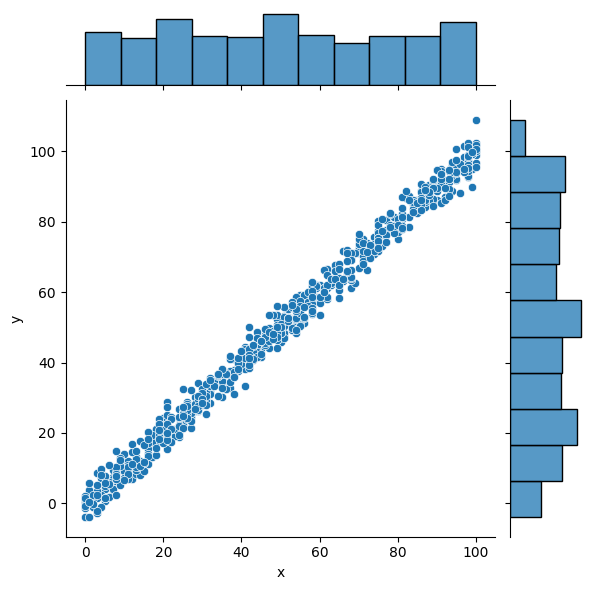

In [62]:
sns.jointplot(df,x='x',y='y')

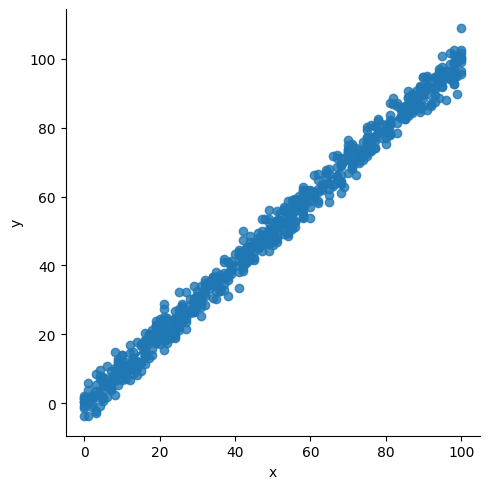

In [63]:
sns.lmplot(df,x='x',y='y')